# Dataset inspection

🍉 Using the `Neovision` package

### Import the Neo👓(vision) classes + other useful packages

In [2]:
# PastequeFlow imports
from plotly.subplots import make_subplots
import PastequeFlow as pf
from Constants import Constants as Cst

cst = Cst()

# Other imports
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"
pio.templates.default = "plotly_dark"


### Load the data using CSVLoader

(In preview mode to avoid centering image means and dividing by the image's standard deviation)

In [11]:
csv_loader = pf.data.datasources.CSVLoader(
    train_val_csv_path=cst.file.train_val_csv_path,
    test_csv_path=cst.file.test_csv_path,
    x_col="image",
    y_col="char"
)

In [12]:
print(f"Classes ({len(csv_loader.classes)}):\n", csv_loader.classes)
print("\n\n")
print("Class mappings:\n", csv_loader.class_mappings)
print("\n\n")
print("Classes repartition:\n", csv_loader.classes_repartition)
print("\n\n")
print("Weights:\n", csv_loader.weights)

Classes (36):
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'
 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']



Class mappings:
 {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j', 20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't', 30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z'}



Classes repartition:
 5    305
u    289
7    281
z    279
a    276
0    271
s    270
j    246
y    246
c    239
i    235
6    232
m    217
1    212
v    210
t    209
b    208
q    189
n    188
l    188
d    187
f    172
x    171
e    165
4    160
r    147
8    139
9    135
2    135
3    128
p    127
w    121
g    111
k    107
o    106
h     99
Name: char, dtype: int64



Weights:
 {0: 0.7175071750717508, 1: 0.9171907756813418, 2: 1.440329218106996, 3: 1.5190972222222223, 4: 1.2152777777777777, 5

### Build the dataset using ImageDatasetBuilder

In [14]:
dataset_builder = pf.data.dataset_builders.ImageDatasetBuilder(
    train_img_dir=cst.file.train_val_data_dir,
    test_img_dir=cst.file.test_data_dir
)

train_ds, val_ds = dataset_builder.get_train_val_datasets(
    x_y_data=csv_loader.get_train_val_data(),
    classes=csv_loader.classes
)
test_ds = dataset_builder.get_testing_dataset(
    x_y_data=csv_loader.get_testing_data(),
    classes=csv_loader.classes
)

In [15]:
print("train dataset:")
for image, label in train_ds.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)

print("\nval dataset:")
for image, label in val_ds.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)

print("\ntest dataset:")
for image in test_ds.take(1):
    print("Image shape:", image.shape)

train dataset:
Image shape: (112, 112, 3)
Label: tf.Tensor(29, shape=(), dtype=int64)

val dataset:
Image shape: (112, 112, 3)
Label: tf.Tensor(6, shape=(), dtype=int64)

test dataset:
Image shape: (112, 112, 3)


### Plot some images!

Found 5600 validated image filenames belonging to 36 classes.
Input shape: (9, 112, 112, 3)
Output shape: (9, 36)


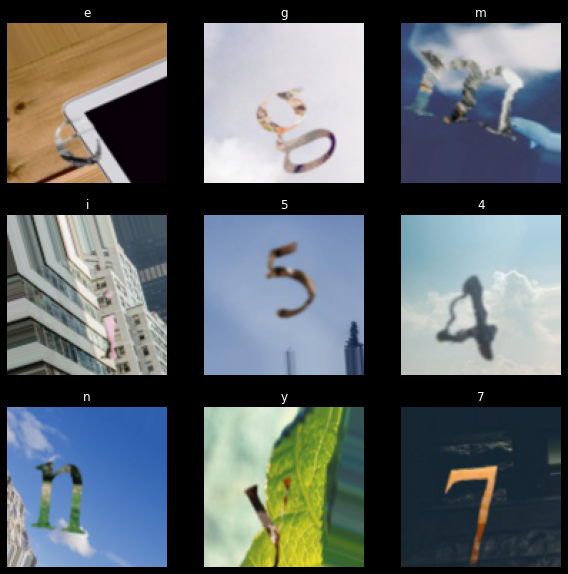

In [21]:
# iterator = images_iterator()
# images, labels = iterator.next()
# print(f"Input shape: {images.shape}")
# print(f"Output shape: {labels.shape}")
#
# plt.figure(figsize=(10, 10))
# for i, (image, label) in enumerate(zip(images, labels)):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(image.astype(np.uint8))
#     label_int = np.argmax(label, axis=-1)
#     plt.title(str(class_mappings[label_int]))
#     plt.axis("off")